# ETF 골든 크로스 및 데드 크로스 확인

- 아래 코드는 주어진 모든 ETF 티커 리스트에 대해 골든 크로스(Golden Cross)와 데드 크로스(Dead Cross)를 식별하고 시각화합니다.



### 사용한 ETF 티커 리스트
- KODEX 200 (069500.KS)

- Tiger KOSDAQ 150 ETF (232080.KS)

- TIGER S&P500 Futures ETF (143850.KS)

- Tiger Synth-Euro Stocks 50 ETF H (195930.KS)

- KINDEX Japan Nikkei225 ETF(H) (238720.KS)

- TIGER ChinaA300 ETF (192090.KS)

- KOSEF 10년 국채 (148070.KS)

- KBSTAR KRX300 (136340.KS)

- TIGER 미국 채권 (182490.KS)

- KODEX 골드 선물 (132030.KS)

- TIGER WTI 원유 (130680.KS)

- KODEX 인버스 (114800.KS)

- KOSEF 미국달러선물 (138230.KS)

- KOSEF 미국달러선물인버스 (139660.KS)


## 1. 필요한 라이브러리 임포트

In [ ]:
!pip install finance-datareader

import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import yfinance as yf


## 2. ETF 티커 리스트 정의

In [ ]:
# ETF 티커 리스트
etf_tickers = [
    "069500.KS",  # KODEX 200
    "232080.KS",  # Tiger KOSDAQ 150 ETF
    "143850.KS",  # TIGER S&P500 Futures ETF
    "195930.KS",  # Tiger Synth-Euro Stocks 50 ETF H
    "238720.KS",  # KINDEX Japan Nikkei225 ETF(H)
    "192090.KS",  # TIGER ChinaA300 ETF
    "148070.KS",  # KOSEF 10년 국채
    "136340.KS",  # KBSTAR KRX300
    "182490.KS",  # TIGER 미국 채권
    "132030.KS",  # KODEX 골드 선물
    "130680.KS",  # TIGER WTI 원유
    "114800.KS",  # KODEX 인버스
    "138230.KS",  # KOSEF 미국달러선물
    "139660.KS"   # KOSEF 미국달러선물인버스
]

## 3. 데이터 기간 설정

In [ ]:
# 시작일과 종료일 설정
start_date = '2024-01-01'
end_date = '2024-07-21'

## 4. 각 ETF에 대해 데이터 수집, 골든 크로스/데드 크로스 식별 및 시각화

[*********************100%%**********************]  1 of 1 completed


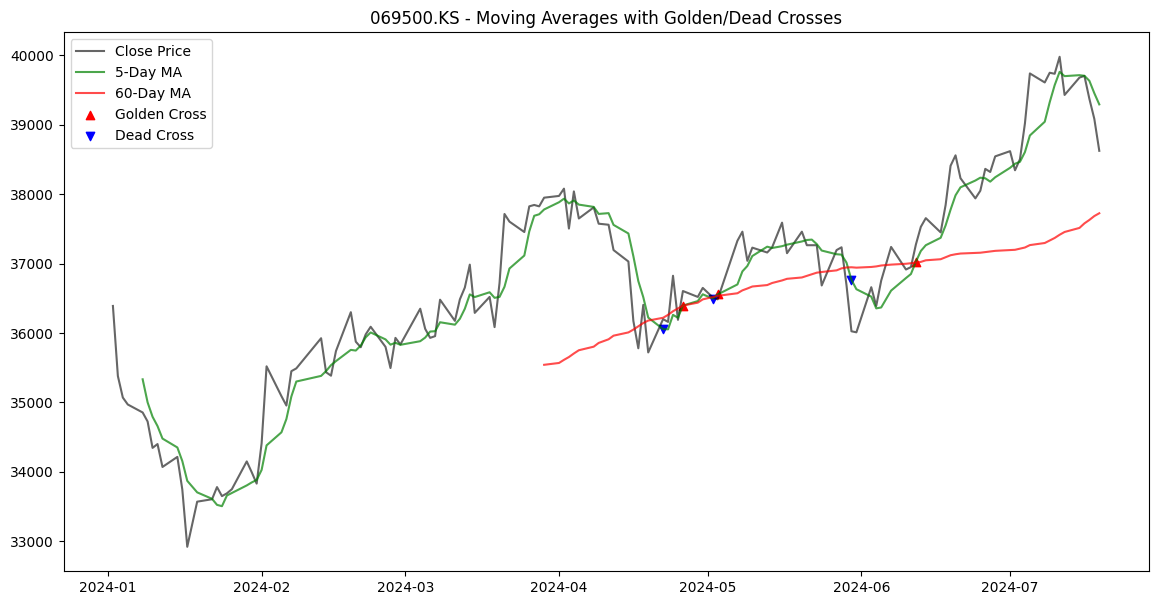

[*********************100%%**********************]  1 of 1 completed


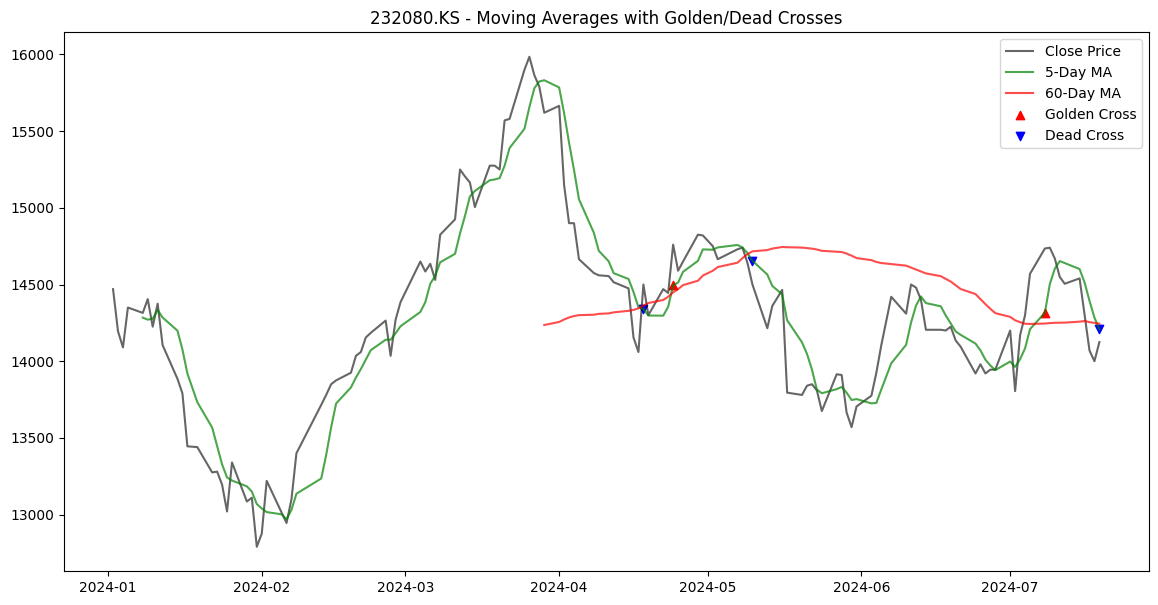

[*********************100%%**********************]  1 of 1 completed


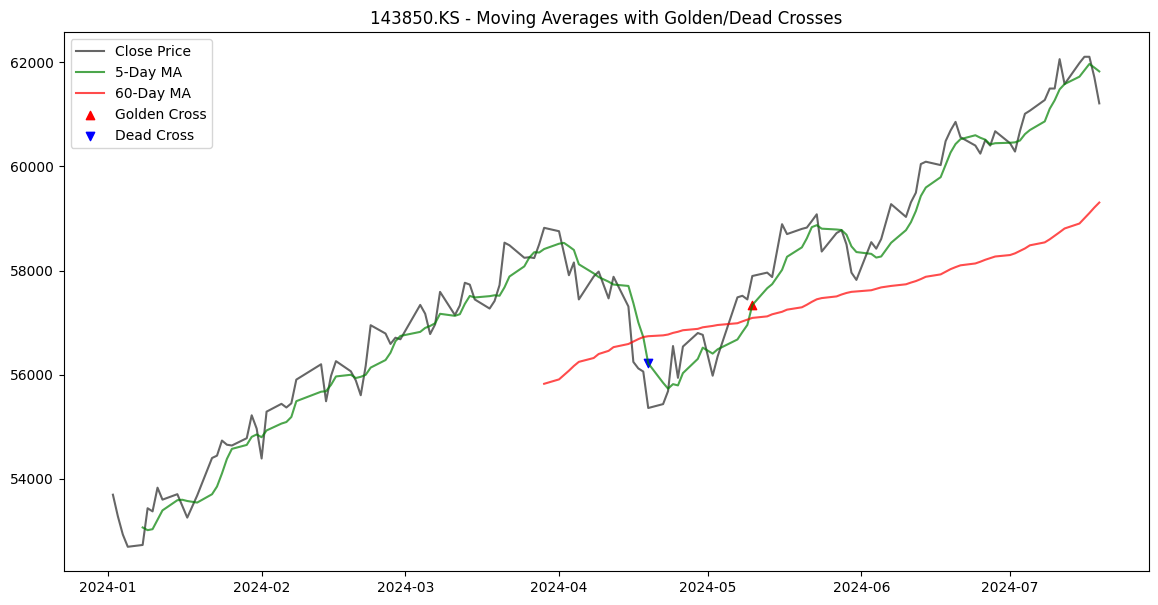

[*********************100%%**********************]  1 of 1 completed


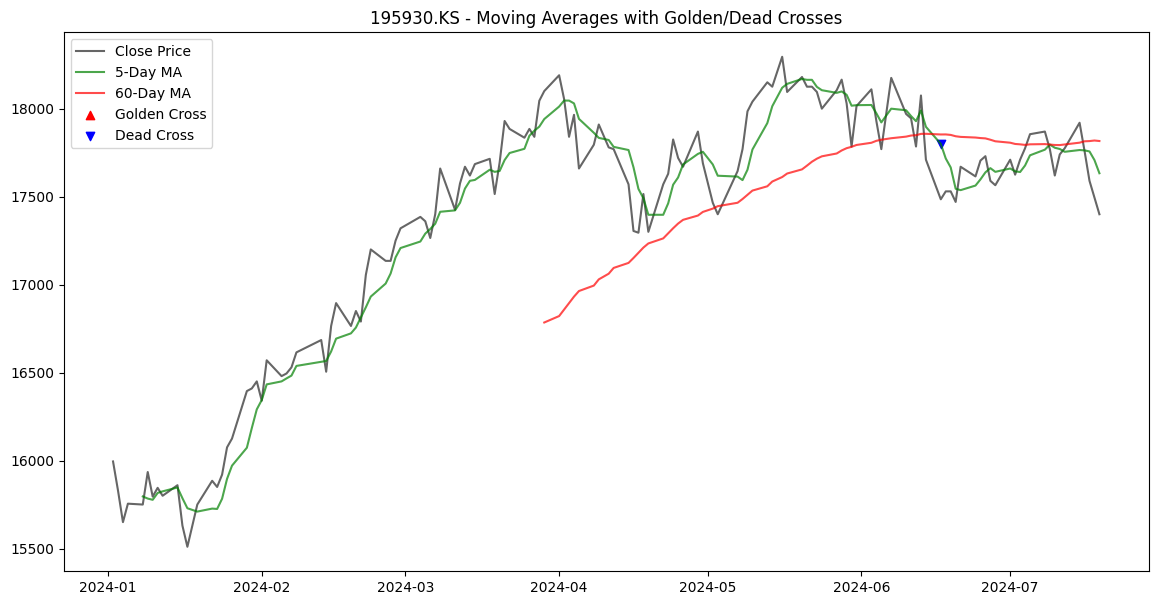

[*********************100%%**********************]  1 of 1 completed


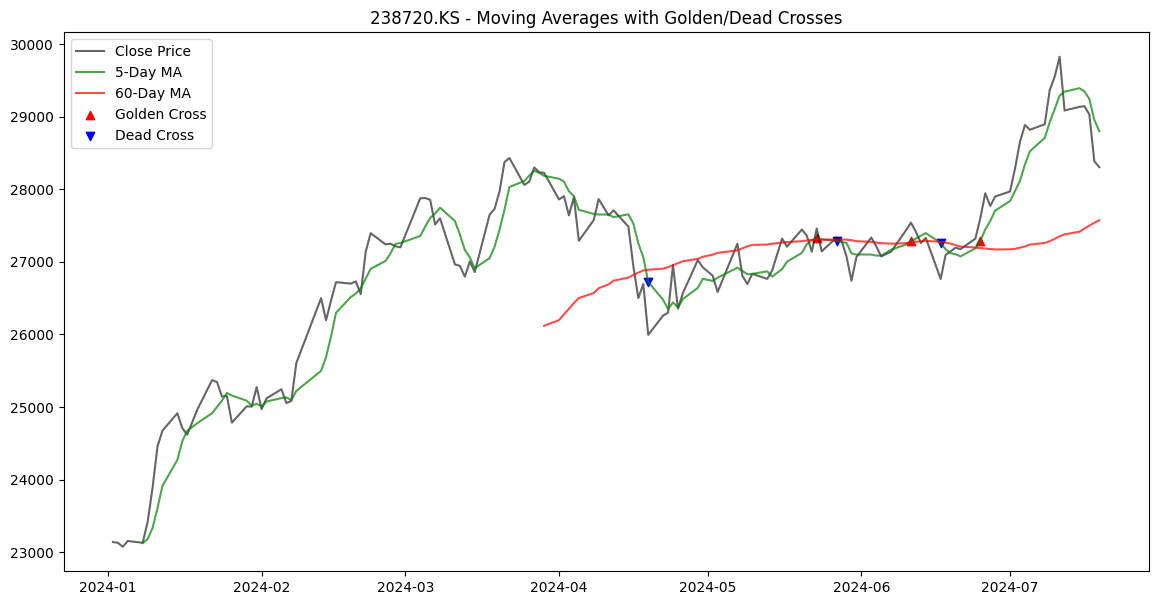

[*********************100%%**********************]  1 of 1 completed


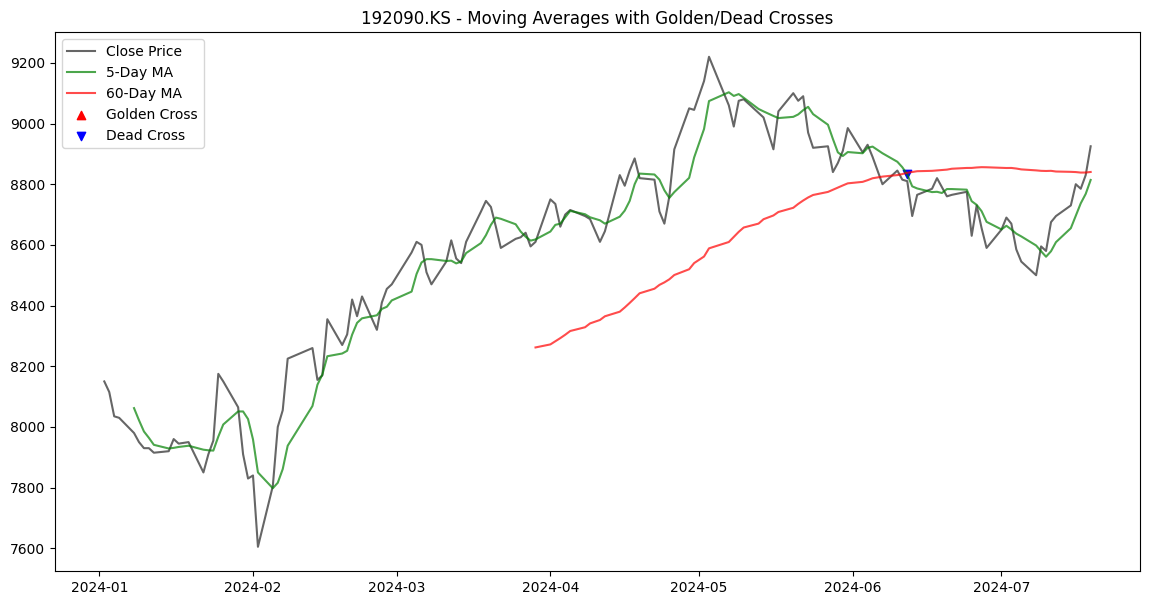

[*********************100%%**********************]  1 of 1 completed


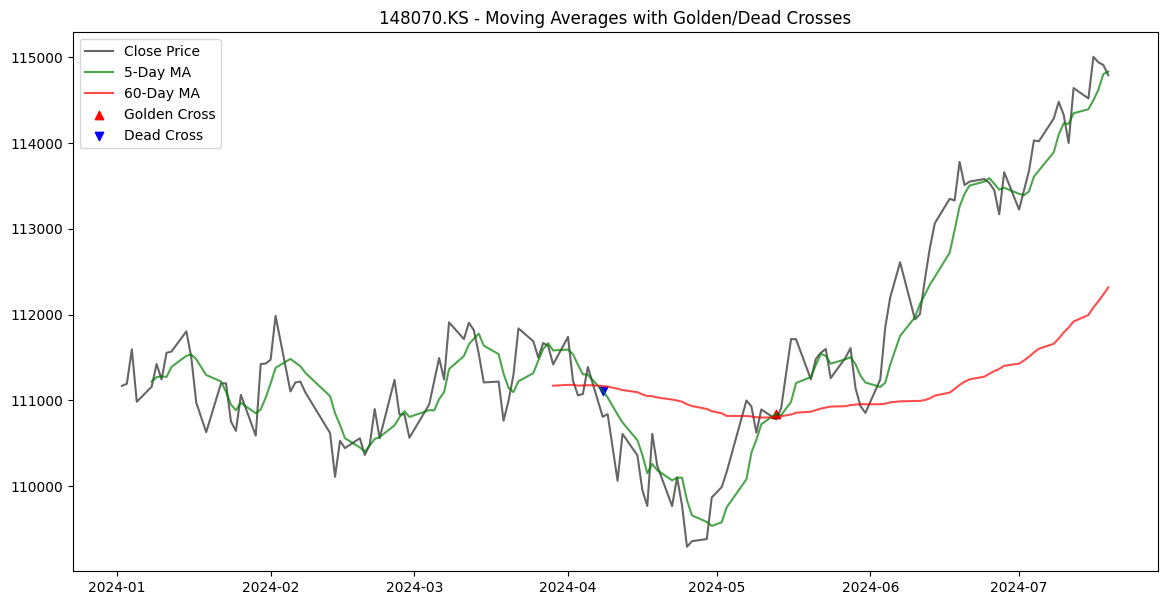

[*********************100%%**********************]  1 of 1 completed


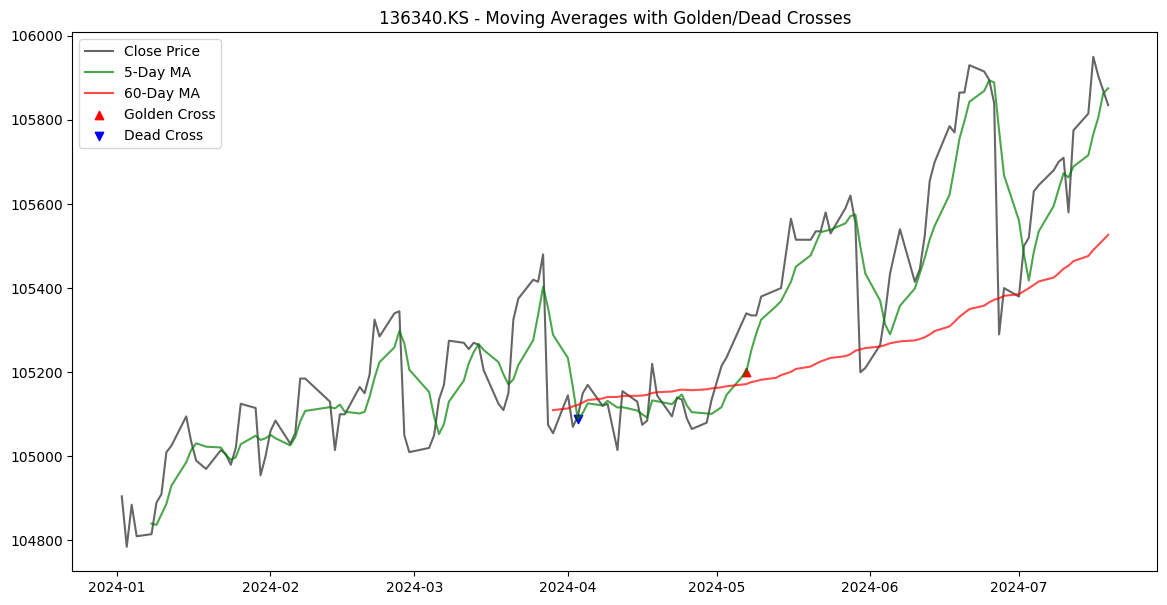

[*********************100%%**********************]  1 of 1 completed


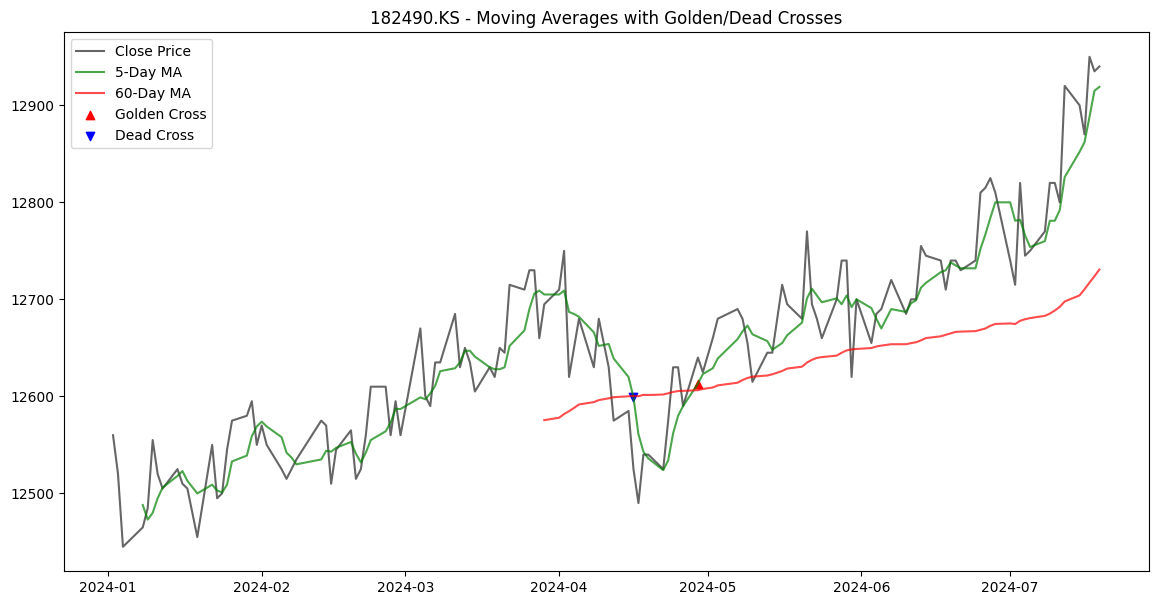

[*********************100%%**********************]  1 of 1 completed


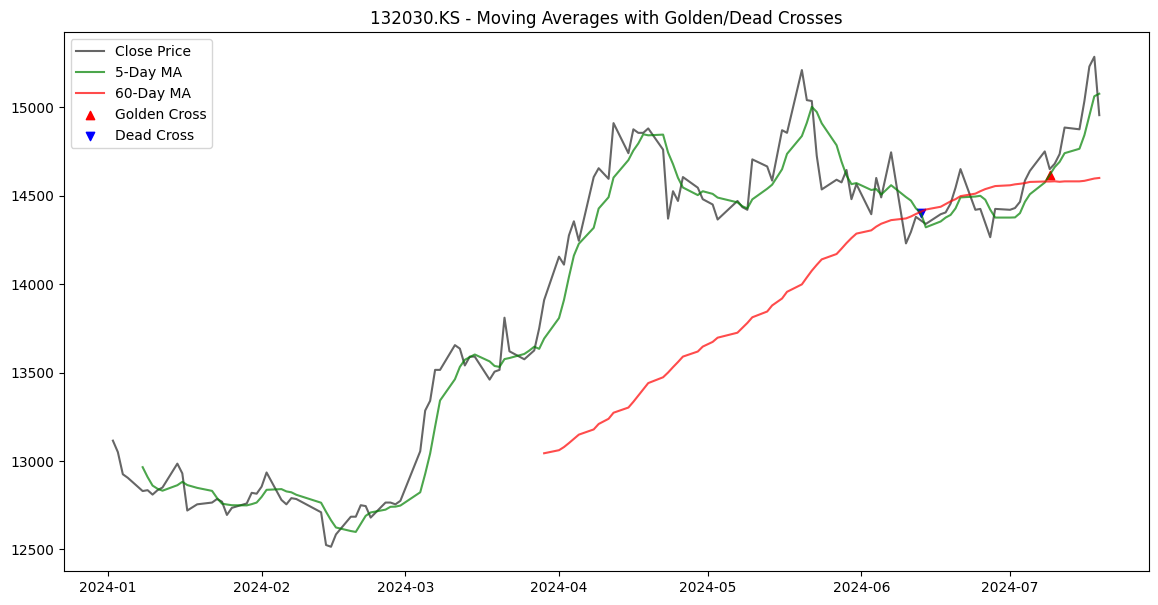

[*********************100%%**********************]  1 of 1 completed


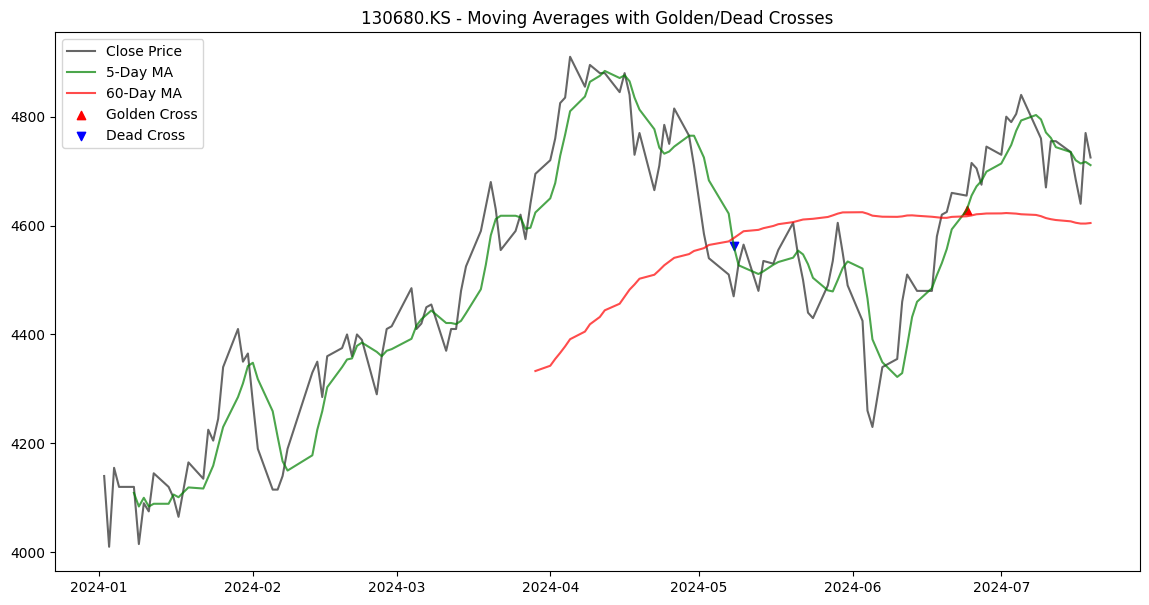

[*********************100%%**********************]  1 of 1 completed


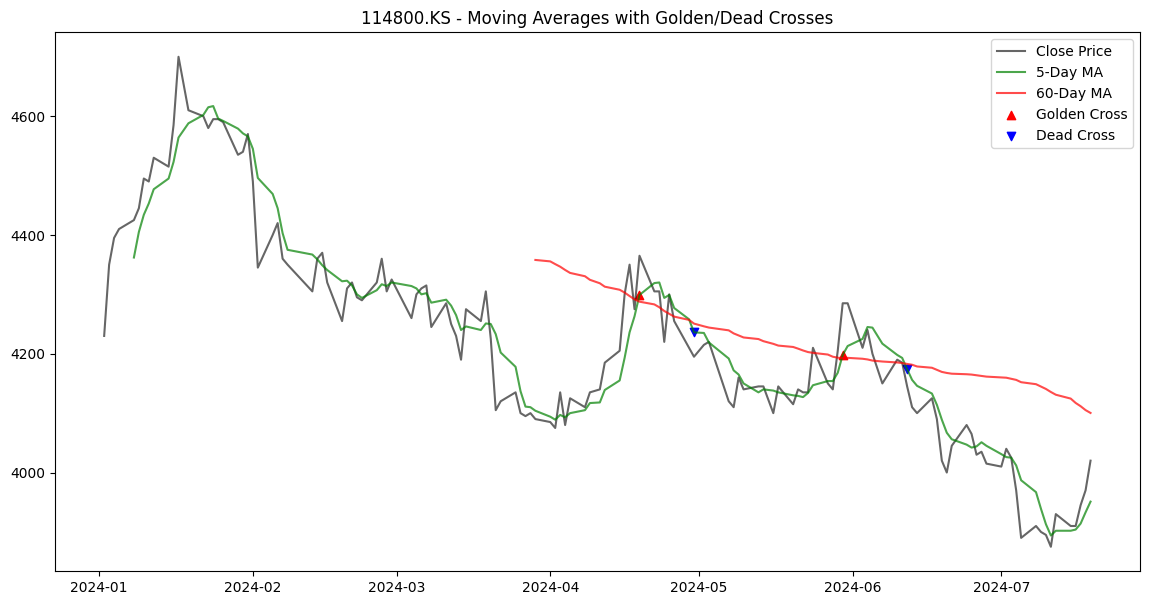

[*********************100%%**********************]  1 of 1 completed


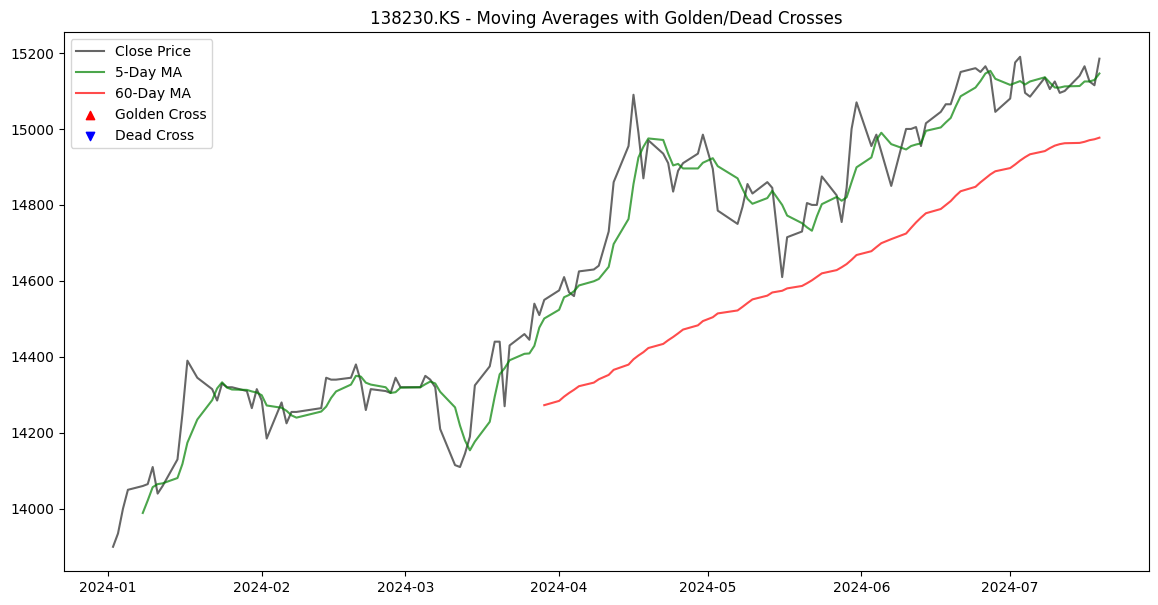

[*********************100%%**********************]  1 of 1 completed


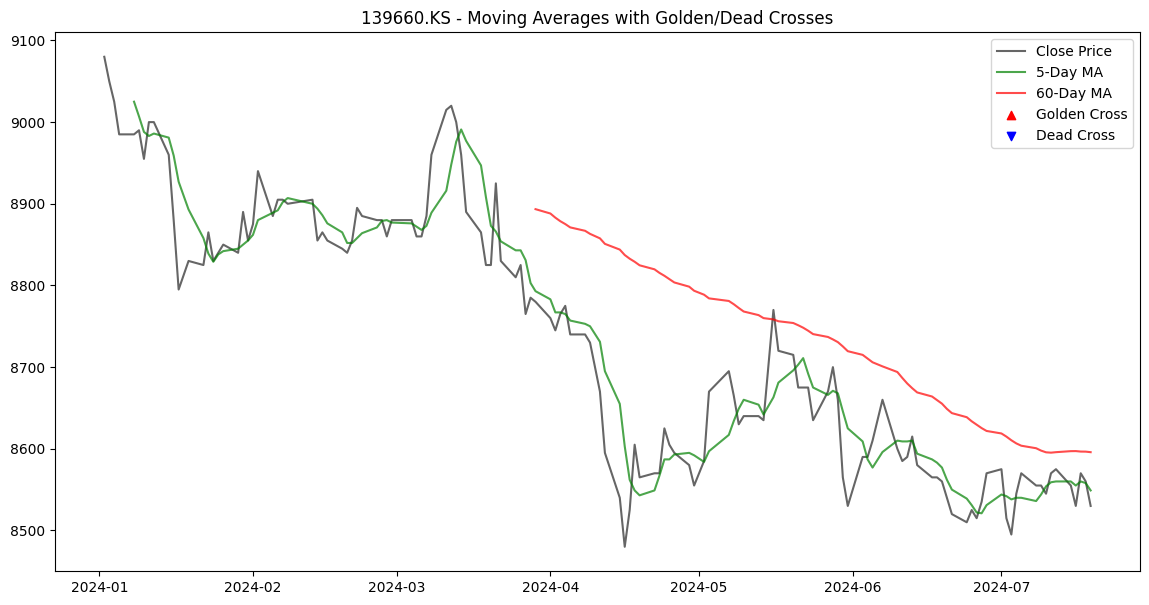

In [ ]:
# 각 ETF에 대해 데이터 수집, 골든 크로스/데드 크로스 식별 및 시각화
for ticker in etf_tickers:
    try:
        # 데이터 수집
        df = yf.download(ticker, start=start_date, end=end_date)

        # 데이터가 충분한지 확인
        if df.empty or 'Close' not in df.columns:
            raise KeyError(f"No valid data for {ticker}")

        # 이동 평균선 계산
        df['MA5'] = df['Close'].rolling(window=5).mean()
        df['MA60'] = df['Close'].rolling(window=60).mean()

        # 골든 크로스와 데드 크로스 식별
        df['Golden Cross'] = ((df['MA5'] > df['MA60']) & (df['MA5'].shift(1) <= df['MA60'].shift(1)))
        df['Dead Cross'] = ((df['MA5'] < df['MA60']) & (df['MA5'].shift(1) >= df['MA60'].shift(1)))

        # 시각화
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['Close'], label='Close Price', color='black', alpha=0.6)
        plt.plot(df.index, df['MA5'], label='5-Day MA', color='green', alpha=0.7)
        plt.plot(df.index, df['MA60'], label='60-Day MA', color='red', alpha=0.7)

        # 골든 크로스 포인트 표시
        plt.scatter(df[df['Golden Cross']].index, df['MA5'][df['Golden Cross']], color='red', label='Golden Cross', marker='^', alpha=1)

        # 데드 크로스 포인트 표시
        plt.scatter(df[df['Dead Cross']].index, df['MA5'][df['Dead Cross']], color='blue', label='Dead Cross', marker='v', alpha=1)

        plt.title(f'{ticker} - Moving Averages with Golden/Dead Crosses')
        plt.legend()
        plt.show()

    except KeyError as e:
        print(f"Skipping {ticker} due to data error: {e}")
    except Exception as e:
        print(f"An error occurred for {ticker}: {e}")